In [1]:
# Importing required functionalities
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

**Let's get the feature vectors and the image paths from the pickle file**

In [2]:
file_names = pickle.load(open('Embeddings/caltech101_file_paths.pickle','rb'))
feature_vecs = pickle.load(open('Embeddings/caltech101_embeddings.pickle','rb'))

**We use K-nn to find the relevant features of the query image/feature.**

In [3]:
knn = NearestNeighbors(algorithm='brute',n_neighbors=5,metric='euclidean')

In [4]:
knn.fit(feature_vecs)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

# Let's  query an image and get its relevant images:

In [5]:
Distance,indices = knn.kneighbors(feature_vecs[1].reshape(1,-1))

In [6]:
print(Distance.shape)

(1, 5)


**Let's get images**

In [7]:
from tensorflow.keras.preprocessing import image

In [8]:
indices.shape , Distance.shape

((1, 5), (1, 5))

**Let's define a function to get the similar image instances** 

In [9]:
def Get_imgs(indices):
    imgs= []
    for i in range(indices.shape[1]):
        img_name = file_names[int(indices[:,i])]
        img = image.load_img(img_name,target_size=(224,224))
        imgs.append(img)
    return imgs

**Let's define a function to plot the similar images**

In [14]:
def plot_queries(indices,Distance):
    imgs = Get_imgs(indices) # Loaded image instances
    plt.figure(figsize=(15,15))
    for i in range(indices.shape[1]):
        plt.subplot(1,indices.shape[1],i+1)
        plt.imshow(imgs[i])
        if i ==0:
            plt.title('Query image')
        else:
            plt.title('Similar image : {}'.format(i)+'\n'+'Distance : %.3f'%(Distance[:,i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

#   -----------------------------------------------------------------

# Test 

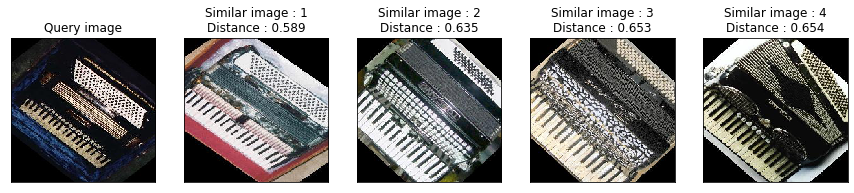

In [15]:
plot_queries(indices=indices,Distance=Distance)

# Let's define a more generic function:

In [16]:
def Query(feature_vec,algo=knn):
    feature_vec = feature_vec.reshape(1,-1) # Reshape if given a 1d array (vector)
    assert(feature_vec.ndim == 2)
    distance, indices = algo.kneighbors(feature_vec)
    plot_queries(indices=indices,Distance=distance)

**Pass only trained_nearest_neighbours to parameter algo, since our function doesn't work for all clustering algorithms** 

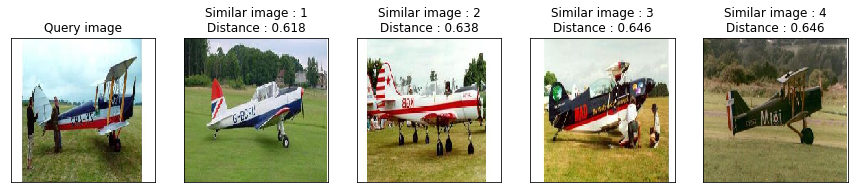

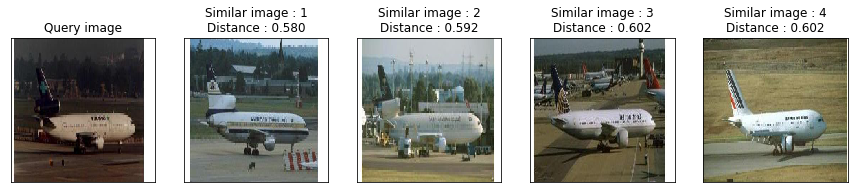

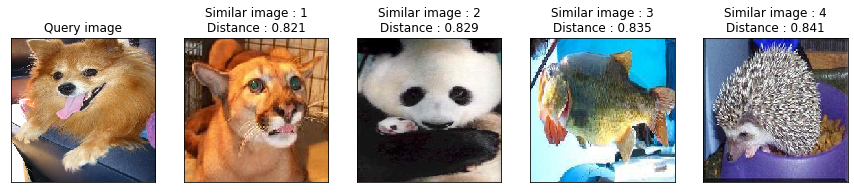

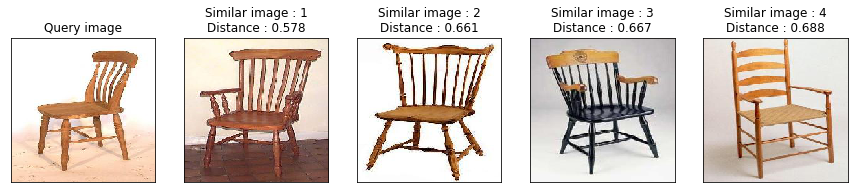

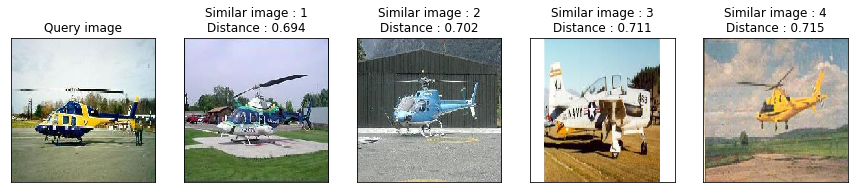

In [17]:
Query(feature_vec=feature_vecs[100],) 
Query(feature_vec=feature_vecs[200])
Query(feature_vec=feature_vecs[1000])
Query(feature_vec=feature_vecs[9000])
Query(feature_vec=feature_vecs[5000])

**Seems we got pretty good results, but it is not the best way to do image retrieval.**